In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
import astropy.constants as const
from astropy.table import QTable
import os
import shutil
import pdb

In [25]:
# lets define some initial conditions that Lehmer uses

# number of sims to run
n = 10000

# star conditions
dMass_star = 1
dAge = np.array([1e6,3e6,10e6]) # ages at which the planet forms, choosing various times
name_star = 'star'
modules_star = 'stellar'

# planet conditions

# Lehmer parameters
dPresXUV = np.random.uniform(0.1,10,n)
dAtmGasConst = np.random.uniform(3600,4157,n)
dThermTemp = np.random.uniform(880,3000,n)
dFXUV = np.random.uniform(43,172,n)
AtmMassFrac = np.random.uniform(0.01,0.1,n)
dAtmXAbsEffH = np.random.uniform(0.1,0.6,n)
#dAtmXAbsEffH = 0.1
sPlanetRadiusModel = "lehmer"
dSatXUVtime = np.random.uniform(80e6,120e6,n)
# Planet parameters
name_b = 'b'
modules_b = 'atmesc'
bHaltEnvelopeGone = 1
dMass_planet = np.random.uniform(0.5,10,n)
dEnvelopeMass = dMass_planet * AtmMassFrac
dSemi = 0.1
saOutputOrder = "Time -Mass -EnvelopeMass -DEnvMassDt -RadSolid -RadXUV -PresSurf -FXUV"

#vpl.in
systemname = 'atm'
iVerbose = 5
bOverwrite = 1
bodyfiles = 'star.in b.in'
unitmass = 'solar'
unitlength = 'aU'
unittime = 'years'
unitangle = 'd'
unittemp = 'K'
dolog = 1
digits = 16
minvalue = 1e-10
doforward = 1
vardt = 1
eta = 0.01
stoptime = 100e6
outputtime = 1e4


In [26]:
# now lets write some files
runs_dir = "/home/dm1681/Merging_Perts/Research/Merging_Perts/lehmer_reprod/"

i = 0

while i <= n-1:
    # lets convert the above values to strings so easier to write to file
    name_idx = "%05i"%i
    if os.path.isdir(runs_dir+name_idx) == True: #sim folders exist
        shutil.rmtree(runs_dir) #removes previous folders; THIS LINE DELETES THE ENTIRE RUNS DIRECTORY
        os.makedirs(runs_dir+name_idx)
    else: #sims folder does not exist
        os.makedirs(runs_dir+name_idx)
    
    bHaltEnvelopeGone_str = str(bHaltEnvelopeGone)
    dPresXUV_str = str(dPresXUV[i])
    dAtmGasConst_str = str(dAtmGasConst[i])
    dThermTemp_str = str(dThermTemp[i])
    dFXUV_str = str(dFXUV[i])
    dAtmXAbsEffH_str = str(dAtmXAbsEffH[i])
    #dAtmXAbsEffH_str = str(dAtmXAbsEffH)
    dSatXUVtime_str = str(dSatXUVtime[i])
    dMass_planet_str = str(dMass_planet[i] * -1)
    dEnvelopeMass_str = str(dEnvelopeMass[i] * -1)
    dSemi_str = str(dSemi)
    dMass_star_str = str(dMass_star)
    dAge_star_str = str(dAge[2])
    #vpl.in
    iVerbose_str = str(iVerbose)
    bOverwrite_str = str(bOverwrite)
    bDoLog_str = str(dolog)
    iDigits_str = str(digits)
    dMinValue_str = str(minvalue)
    bDoForward_str = str(doforward)
    bVarDt_str = str(vardt)
    dEta_str = str(eta)
    dStopTime_str = str(stoptime)
    dOutputTime_str = str(outputtime)
    
    
    # now lets write to file
    # b.in
    b = open(runs_dir+name_idx+'/b.in','w')
    b_content = ('sName\t\t\t' + name_b + 
                 '\nsaModules\t\t' + modules_b +
                 '\n\ndMass\t\t\t' + dMass_planet_str + 
                 '\n\ndSemi\t\t\t' + dSemi_str + 
                 '\n\nbHaltEnvelopeGone\t' + bHaltEnvelopeGone_str +
                 '\ndEnvelopeMass\t\t' + dEnvelopeMass_str + 
                 '\ndAtmXAbsEffH\t\t' + dAtmXAbsEffH_str +
                 '\n\nsPlanetRadiusModel\t' + sPlanetRadiusModel +
                 '\ndThermTemp\t\t' + dThermTemp_str +
                 '\ndPresXUV\t\t' + dPresXUV_str +
                 '\ndAtmGasConst\t\t' + dAtmGasConst_str +
                 '\ndFXUV\t\t\t' + dFXUV_str + 
                 '\n\nsaOutputOrder\t' + saOutputOrder + 
                 '\n'
                )
    b.write(b_content)
    b.close()
    
    star = open(runs_dir+name_idx+'/star.in','w')
    star_content = ('sName\t\t' + name_star +
                    '\nsaModules\t' + modules_star +
                    '\n\ndMass\t\t' + dMass_star_str + 
                    #'\n\ndAge\t\t' + dAge_star_str + 
                    '\n'
                   )
    star.write(star_content)
    star.close()
    
    vpl = open(runs_dir+name_idx+'/vpl.in','w')
    vpl_content = ('sSystemName\t' + systemname +
                   '\niVerbose\t' + iVerbose_str + 
                   '\nbOverwrite\t' + bOverwrite_str +
                   '\n\nsaBodyFiles\t' + bodyfiles +
                   '\n\nsUnitMass\t' + unitmass +
                   '\nsUnitLength\t' + unitlength +
                   '\nsUnitTime\t' + unittime + 
                   '\nsUnitAngle\t' + unitangle +
                   '\nsUnitTemp\t' + unittemp +
                   '\n\nbDoLog\t\t' + bDoLog_str + 
                   '\niDigits\t\t' + iDigits_str + 
                   '\ndMinValue\t' + dMinValue_str +
                   '\n\nbDoForward\t' + bDoForward_str + 
                   '\nbVarDt\t\t' + bVarDt_str +
                   '\ndEta\t\t' + dEta_str +
                   '\ndStopTime\t' + dStopTime_str + 
                   '\ndOutputTime\t' + dOutputTime_str + 
                   '\n'
                  )
    vpl.write(vpl_content)
    vpl.close()
    i+=1

In [27]:
# now lets read in the data and try and reproduce his figures
# Figure 2
### plot of RadSolid and Count

def detRXUVisRadSolid(fwd_content):
    RXUV_i = 5
    RadSolid_i = 4
    for line in fwd_content:
        line = line.split(' ')
        time = float(line[0])
        rxuv = float(line[RXUV_i])
        rsol = float(line[RadSolid_i])
        if rxuv <= rsol:
            return True
        if time == 100e6:
            return False

def determineAtmGone(comp_runs_dir, folder_num):
    try:
        folder_name = comp_runs_dir + folder_num
        log_file = open(folder_name + '/log')
        log_content = log_file.read()
        log_content = log_content.split('\n')
        
        fwd_file = open(folder_name + '/atm.b.forward')
        fwd_content = fwd_file.read()
        fwd_content = fwd_content.split('\n')
        if (log_content[5] == "HALT: b's envelope mass =  0.0000000000000000Earth Masses.") or (detRXUVisRadSolid(fwd_content)):
            return True
        else:
            return False
    except IndexError:
        print (folder_num)
        
def getRadSolid(comp_runs_dir, folder_num):
    RadSolid_list = np.array([])
    folder_name = comp_runs_dir + folder_num
    fwd_file = open(folder_name + '/atm.b.forward')
    fwd_content = fwd_file.read()
    fwd_content = fwd_content.split('\n')
    first_line = fwd_content[0]
    first_line = first_line.split(' ')
    RadSolid = float(first_line[4])
    return RadSolid

def getEnvMass(comp_runs_dir, folder_num):
    RadSolid_list = np.array([])
    folder_name = comp_runs_dir + folder_num
    fwd_file = open(folder_name + '/atm.b.forward')
    fwd_content = fwd_file.read()
    fwd_content = fwd_content.split('\n')
    first_line = fwd_content[0]
    first_line = first_line.split(' ')
    RadSolid = float(first_line[4])
    return RadSolid
        


    
comp_runs_dir = './lehmer_reprod/'

n = 9999
i = 0 

RadSolid_atmgone = np.array([])
while i <= n-1:
    folder_num = '%05i'%i
    if determineAtmGone(comp_runs_dir,folder_num):
        RadSolid = getRadSolid(comp_runs_dir,folder_num)
        RadSolid_atmgone = np.append(RadSolid_atmgone, RadSolid)
    i+=1


In [15]:
RadSolid_atmgone.shape

(6239,)

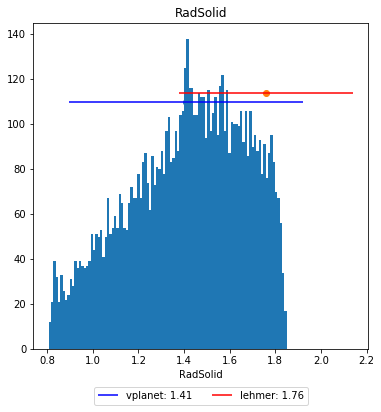

In [28]:
def plotRadHist(RadList,title):
    fig,ax = plt.subplots(1,)
    fig.set_size_inches(6,6)
    
    mean = np.mean(RadList)
    std = np.std(RadList)
    pos_2sig = mean + 2*std
    neg_2sig = mean - 2*std
    
    lehm_mean = 1.76
    lehm_pos2sig = lehm_mean + 0.38
    lehm_neg2sig = lehm_mean - 0.38
    
    plt.rc('text', usetex=False)
    ax.hist(RadList,bins=102)
    ax.set(xlabel='RadSolid', title=title)
    ax.scatter(mean, 110)
    ax.scatter(lehm_mean, 114)
    ax.hlines(110,neg_2sig, pos_2sig, color='blue', label='vplanet: %0.2f'%mean)
    ax.hlines(114,lehm_neg2sig, lehm_pos2sig, color='red', label='lehmer: %0.2f'%lehm_mean)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, ncol=2)
    fig.savefig('RadSolidHist.png')
plotRadHist(RadSolid_atmgone, 'RadSolid')


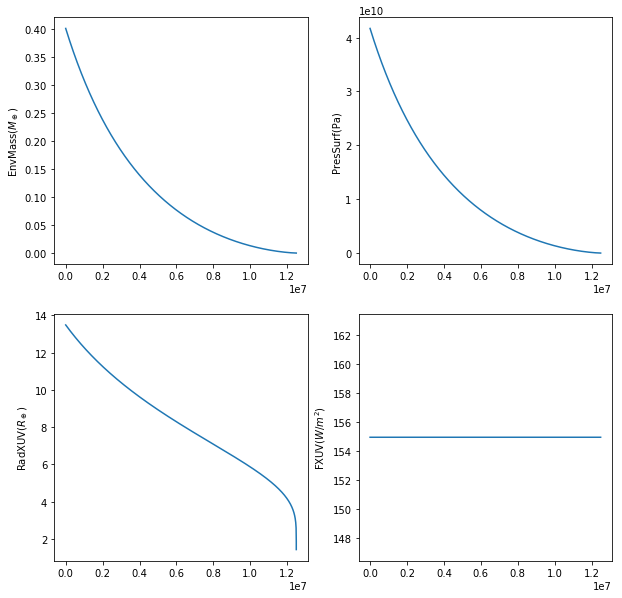

In [14]:
def FourPanelPlot(comp_runs_dir, folder_num):
    # function to plot EnvMass, RadXUV, PresSurf, Fxuv
    fig,ax = plt.subplots(2,2)
    fig.set_size_inches(10,10)
    EnvMass_list = np.array([])
    RadXUV_list = np.array([])
    PresSurf_list = np.array([])
    FXUV_list = np.array([])
    time_list = np.array([])
    fwd_file = open(comp_runs_dir + folder_num + '/atm.b.forward')
    fwd_content = fwd_file.read()
    fwd_content = fwd_content.split('\n')[:-1]
    for line in fwd_content:
        line = line.split(' ')
        EnvMass = float(line[2])
        EnvMass_list = np.append(EnvMass_list, EnvMass)
        RadXUV = float(line[5])
        RadXUV_list = np.append(RadXUV_list, RadXUV)
        PresSurf= float(line[6])
        PresSurf_list = np.append(PresSurf_list, PresSurf)
        FXUV = float(line[7])
        FXUV_list = np.append(FXUV_list, FXUV)
        time = float(line[0])
        time_list = np.append(time_list, time)
    ax[0,0].plot(time_list, EnvMass_list)
    ax[0,0].set(ylabel='EnvMass($M_\oplus$)')
    ax[0,1].plot(time_list, PresSurf_list)
    ax[0,1].set(ylabel='PresSurf(Pa)')
    ax[1,0].plot(time_list, RadXUV_list)
    ax[1,0].set(ylabel='RadXUV($R_\oplus$)')
    ax[1,1].plot(time_list, FXUV_list)
    ax[1,1].set(ylabel='FXUV($W/m^2$)')
    
FourPanelPlot(comp_runs_dir, '00004')
    

In [ ]:
'''
to do:
- analysis of lehmer_reprod data
- run w/0 specifying FXUV
     - for three different ages


- papers (atmesc)
-- Rory tidal critical radius
    - jackson et all 2009
    - levrard (2009)
    - raymond et all (2008)
    - mardling (some distorb)
    - kepler78
--distorb
    - barnes and reinberg 2006 (motion near secular separatrix)
    - email russel 
- atmesc
-- Eric Lopez
-- Emily bolmomt
-- Lammers
-- Catling & Zahnl

'''